<a href="https://colab.research.google.com/github/Ukemedata/Ukemedata/blob/main/ENews_Express_Learner_Notebook_5BFull_Code_Version_Ukeme_Ukoh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

###The executives at E-news Express believe that there is a decline in new monthly subscribers compared to the previous year because the current webpage is not designed well enough to keep customers engaged long enough to subscribe.

###The objective is to compare the customer's response to the new landing page which has more relevant content compared to the old landing page and see if there's a better engagement on the new page by analysing the data from the A/B Test conducted in order to answer questions like;

*   Differences in time spent on the landing pages
*   Conversion rate percentages
*   Dependence of converted status on language
*   Relationship between time spent on pages and language

###To achieve this, we will be using some techniques like Exploratory Data Analysis, Data Visualization and Hypotheses Testing on the dataset.



## Import all the necessary libraries

In [216]:
import numpy as np                                          #importing library for array processing
import pandas as pd                                         #importing library for data structures 
import matplotlib.pyplot as plt                             #importing library for plots
import seaborn as sns                                       #importing library for statistical data visualization  
!pip install plotly
import plotly.express as px                                 #importing plotly for data visualization
%matplotlib inline                                          
import scipy.stats as stats                                 #importing scientific library for python
import statsmodels.stats.proportion                         #importing statistical computations and models for use with scipy
!pip install --upgrade scipy                                #installs current version of scipy for better functionality

## Reading the Data into a DataFrame

In [217]:
from google.colab import drive                              #accessing Google drive from Colab          
drive.mount('/content/drive', force_remount = True)

path="/content/drive/MyDrive/Python Works/abtest.csv"       #reading the data from drive
data=pd.read_csv(path)



Mounted at /content/drive


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [218]:
data.head()                                           #displays the first 5 rows of the dataset

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [219]:
data.tail()                                           #displays the last 5 rows of the dataset

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [220]:
data.shape                                            #diplays shape of dataset, i.e numbers of rows and columns

(100, 6)

In [221]:
data.isnull().sum()                                   #checks for missing values in the dataset

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [222]:
data.info()                                           #shows information on datatypes in each column of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [223]:
data.describe(include='all')                          #displays statistical summary of all variables

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


In [224]:
data.count()                                          #displays data counts for all columns in the dataset

user_id                   100
group                     100
landing_page              100
time_spent_on_the_page    100
converted                 100
language_preferred        100
dtype: int64

In [225]:
data.duplicated().sum()                               #returns count of duplicated data in dataset

0

**Observation** : 

1.   There are 100 rows and 6 columns in the dataset
2.   There are no missing values in the dataset
3.   More users are converted





### Univariate Analysis

**Group**


In [226]:
data['group'].value_counts()                          #returns counts for 'group' column.

control      50
treatment    50
Name: group, dtype: int64

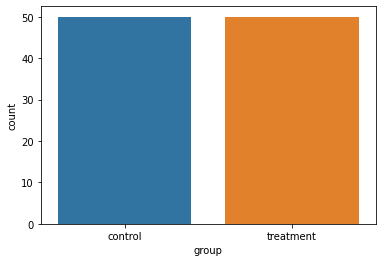

In [227]:
sns.countplot(data=data,x='group');                   #count visualization of 'group' column.
plt.show()

**Observation** : There are equal number of users in both groups, which is 50 respectively.

**Landing** **Page**

In [228]:
data['landing_page'].value_counts()                     #returns counts for 'landing_page' column.                 

old    50
new    50
Name: landing_page, dtype: int64

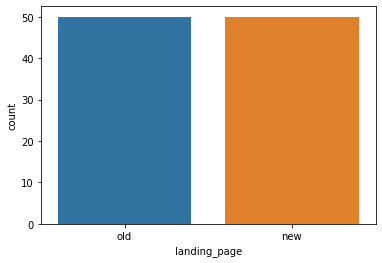

In [229]:
sns.countplot(data=data,x='landing_page');              #count visualization of 'landing_page' column.
plt.show()

**Observation** : There are equal number of users on both landing pages, which is 50 respectively

**Time Spent on The Page**

In [274]:
his = px.histogram(data, x="time_spent_on_the_page")                    #histogram of 'time_spent_on_the_page' column.
his.show()                                                              #displays the plot
plt.show()

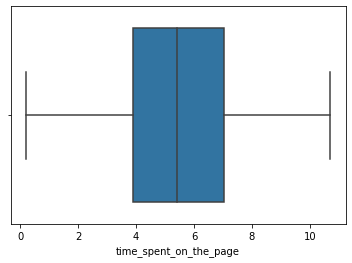

In [231]:
sns.boxplot(data=data,x='time_spent_on_the_page');            #boxplot visualization of 'time_spent_on_the_page' column.
plt.show()                                                    #displays the plot

**Observation** : The peak time spent on the landing page by most users is between 5 to 7 minutes.

**Converted**

In [232]:
data['converted'].value_counts()              #returns counts for 'converted' column.

yes    54
no     46
Name: converted, dtype: int64

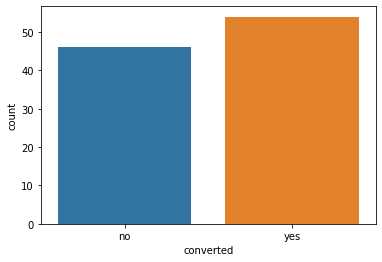

In [233]:
sns.countplot(data=data,x='converted');       #count visualization of 'converted' column.
plt.show()                                    #displays the plot

**Observation** : More users(54) are converted after visiting the landing page

**Language Preferred**

In [234]:
data['language_preferred'].value_counts()       #returns counts for 'language_preferred' column.

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

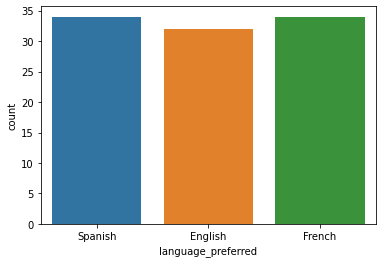

In [235]:
sns.countplot(data=data,x='language_preferred');  #count visualization of 'language_preferred' column.
plt.show()                                        #displays the plot

**Observation** : There are 3 preferred languages, Spanish, English and French, with 34, 32 and 34 users respectively.

### Bivariate Analysis

**Group versus Time Spent On The Page**

In [236]:
his = px.histogram(data, x="time_spent_on_the_page", color='group')                   #histogram of 'time_spent_on_the_page vs group' column.
his.show()                                                                            #displays the plot

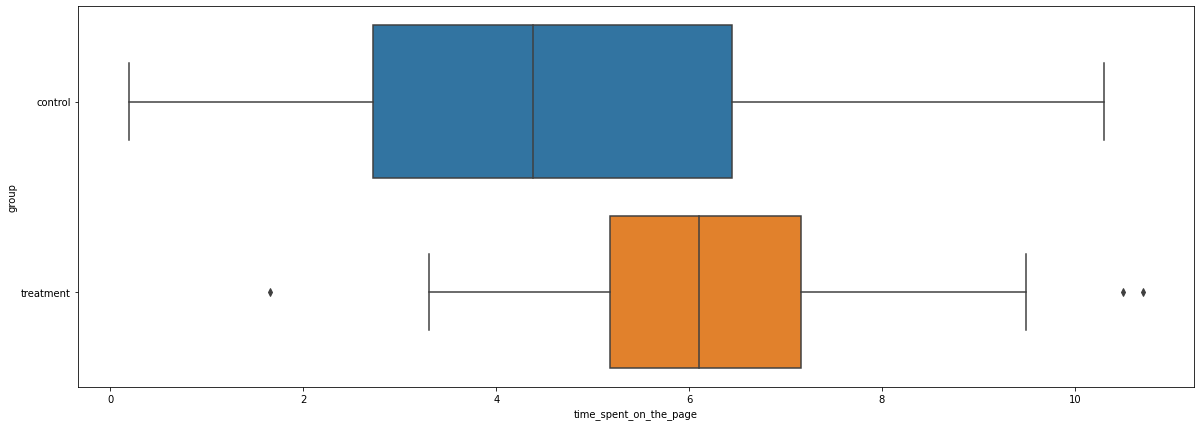

In [237]:
plt.figure(figsize=(20,7))                                    #adjusts size of plot
sns.boxplot(data=data,x='time_spent_on_the_page',y='group');  #visualization of group versus time spent on the page
plt.show()                                                    #keeps plots displayed

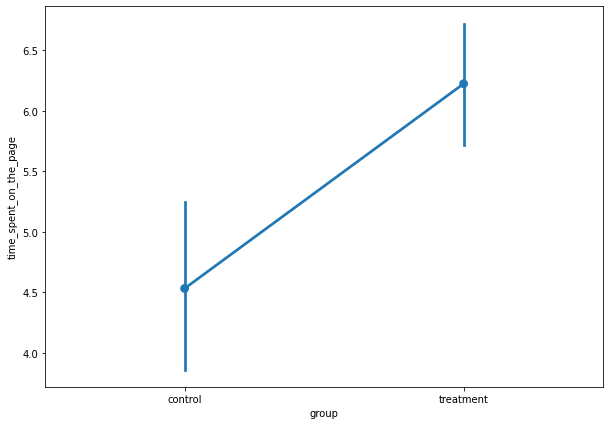

In [238]:
plt.figure(figsize=(10,7))                                      #adjusts size of plot
sns.pointplot(data=data,y='time_spent_on_the_page',x='group');  #visualization of group versus time spent on the page
plt.show()                                                      #keeps plots displayed

**Observation** ;

*   Of the two groups, those in the treatment group, spend more time on the landing page on average
*   There are some users in the treatment group who spend way more, and less time on the landing page than the rest.



**Landing Page versus Time Spent On The Page**

In [239]:
his = px.histogram(data, x="time_spent_on_the_page", color='landing_page')              #histogram of 'time_spent_on_the_page vs landing page' column.
his.show()                                                                              #displays the plot

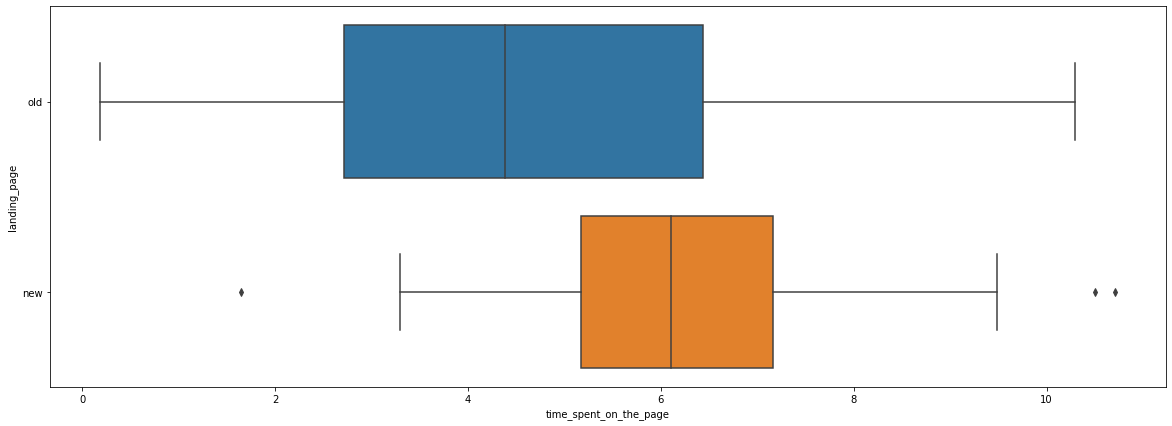

In [240]:
plt.figure(figsize=(20,7))                                            #adjusts size of plot
sns.boxplot(data=data,x='time_spent_on_the_page',y='landing_page');   #visualization of landing page versus time spent on the page
plt.show()                                                            #keeps plots displayed

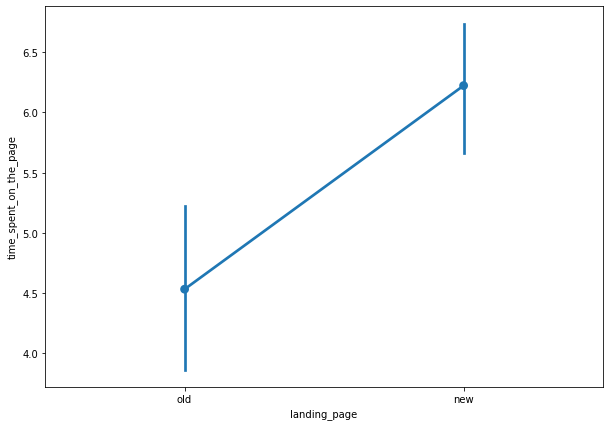

In [241]:
plt.figure(figsize=(10,7))                                                      #adjusts size of plot
sns.pointplot(data=data,y='time_spent_on_the_page',x='landing_page');           #visualization of landing page versus time spent on the page
plt.show()                                                                      #keeps plots displayed

**Observations** : 

*   Users on the new landing page spend more time than those on the old landing page
*   It appears to be that a few users on the new landing page spend way more and less time on the landing page, compared to the other users



**Converted versus Time Spent On The Page**

In [242]:
his = px.histogram(data, x="time_spent_on_the_page", color='converted')               #histogram of 'time_spent_on_the_page vs converted' column.
his.show()                                                                            #displays the plot

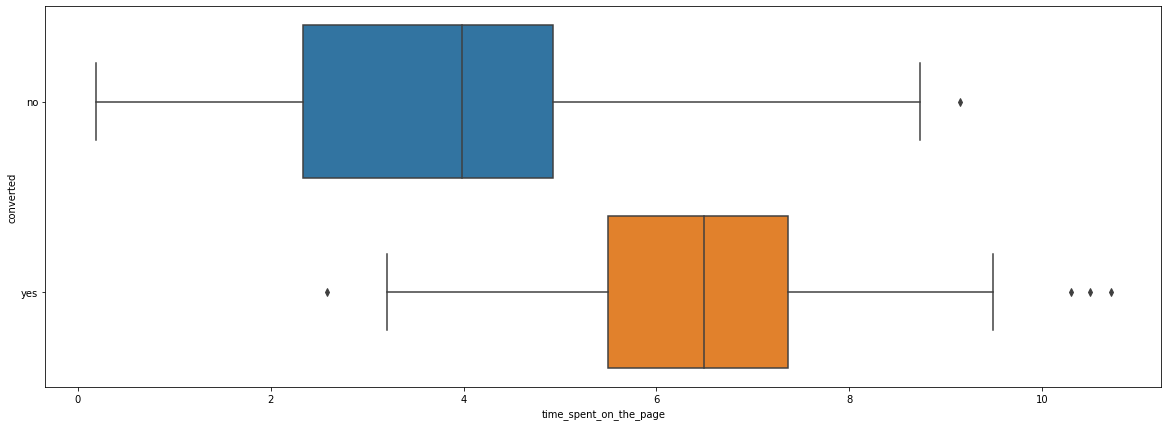

In [243]:
plt.figure(figsize=(20,7))                                                        #adjusts size of plot
sns.boxplot(data=data,x='time_spent_on_the_page',y='converted');                  #visualization of converted versus time spent on the page
plt.show()                                                                        #keeps plots displayed

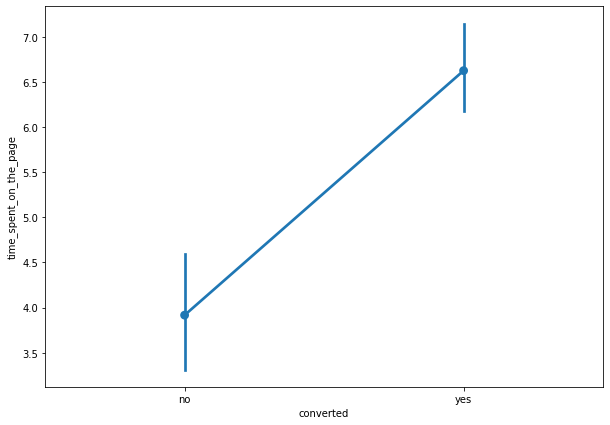

In [244]:
plt.figure(figsize=(10,7))                                                          #adjusts size of plot
sns.pointplot(data=data,y='time_spent_on_the_page',x='converted');                  #visualization of converted versus time spent on the page
plt.show()                                                                          #keeps plots displayed

**Observation** : Converted users spend more time on the landing page

Some converted users are spending more time on the landing page than other converted users.

**Preferred Language versus Time Spent On The Page**

In [245]:
his = px.histogram(data, x="time_spent_on_the_page", color='language_preferred')      #histogram of 'time_spent_on_the_page vs language preferred' column.
his.show()                                                                            #displays the plot

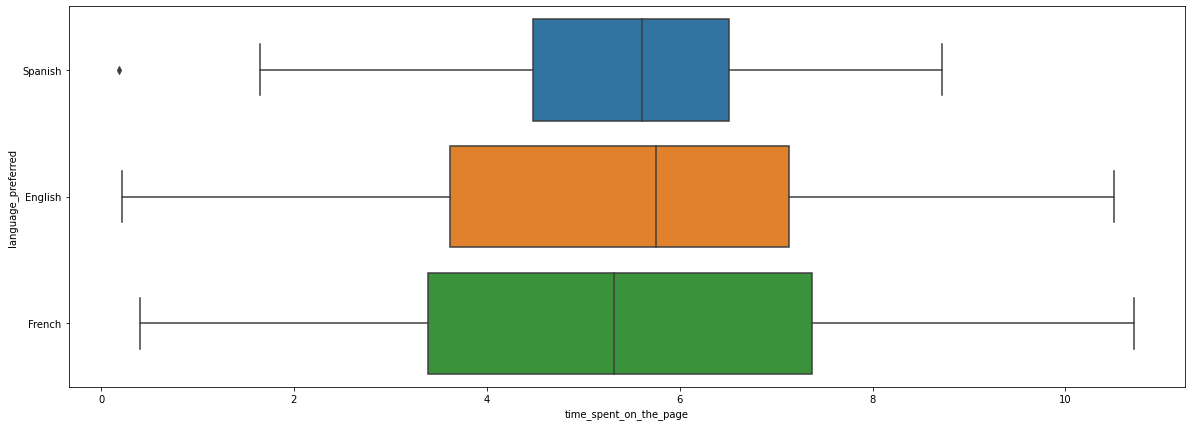

In [246]:
plt.figure(figsize=(20,7))                                                            #adjusts size of plot
sns.boxplot(data=data,x='time_spent_on_the_page',y='language_preferred');             #visualization of language preferred versus time spent on the page
plt.show()                                                                            #keeps plots displayed

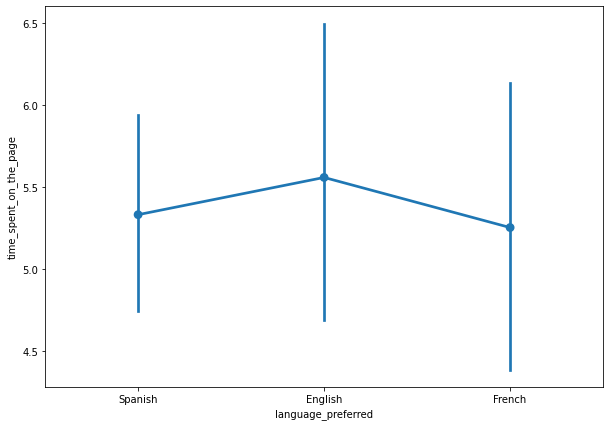

In [247]:
plt.figure(figsize=(10,7))                                                              #adjusts size of plot
sns.pointplot(data=data,y='time_spent_on_the_page',x='language_preferred');             #visualization of language preferred versus time spent on the page
plt.show()                                                                              #keeps plots displayed

**Observation** : Although the time spent on the landing page is quite similar for the 3 different languages, Spanish users spend less time on the page when compared to both English and French language users.

Some Spanish language users spend way less time when compared to other Spanish language users.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

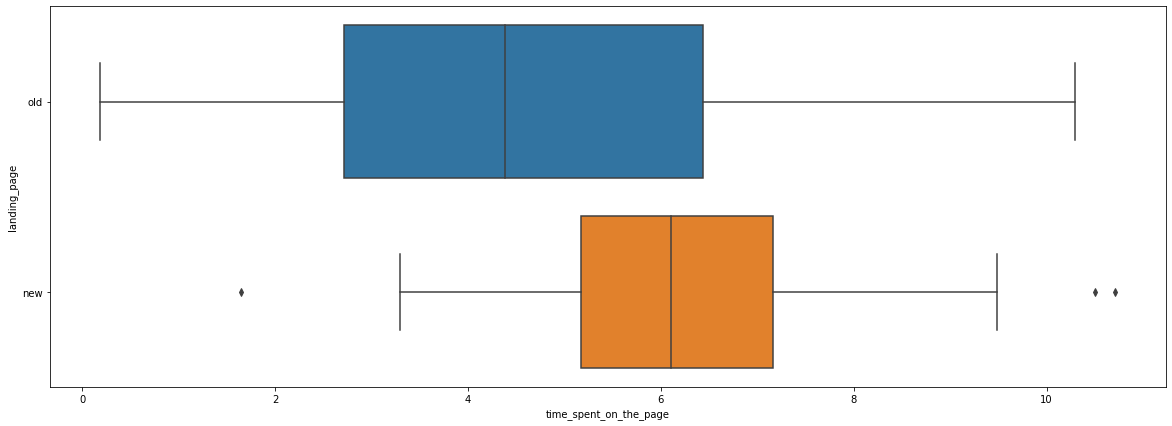

In [248]:
plt.figure(figsize=(20,7))                                                            #adjusts size of plot
sns.boxplot(data=data,x='time_spent_on_the_page',y='landing_page');                   #visualization of landing page versus time spent on the page
plt.show()                                                                            #keeps plots displayed

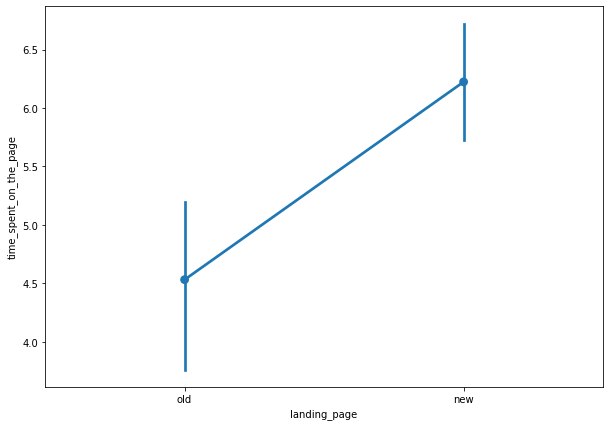

In [249]:
plt.figure(figsize=(10,7))                                                             #adjusts size of plot
sns.pointplot(data=data,y='time_spent_on_the_page',x='landing_page');                  #visualization of landing page versus time spent on the page
plt.show()                                                                             #keeps plots displayed

**Observation**: The users spend more time on the new landing page than the old landing page. Just over 6 minutes is the average time spent on the new landing page, while the average time spent on the old landing page is between 4 to 5 minutes. 

### Step 1: Define the null and alternate hypotheses


For the given problem,

  $H_0$: $μ_1$ = $μ_2$

$H_a$: $μ_1$< $μ_2$ ,

where 
$μ_1$ is mean time spent on the old landing page and 

$μ_2$ is mean time spent on the new landing page

### Step 2: Select Appropriate test

The above problem is a one-tailed problem involving 2 independent populations, hence a 2 sample independent t-test will be used, since the standard deviations are unknown

### Step 3: Decide the significance level

From the original problem, the significance level, $\alpha$ = 0.05

### Step 4: Collect and prepare data

In [250]:
new_page_time_spent = data[data['landing_page'] == 'new']['time_spent_on_the_page']                               #displays time spent on the new landing page      
old_page_time_spent = data[data['landing_page'] == 'old']['time_spent_on_the_page']                               #displays time spent on the old landing page

In [251]:
print('The average time spent on the new page is', round(new_page_time_spent.mean(),2),'minutes,')                #prints mean time spent on the new landing page
print('while the average time spent on the old page is', round(old_page_time_spent.mean(),2),'minutes.')          #prints mean time spent on the old landing page

The average time spent on the new page is 6.22 minutes,
while the average time spent on the old page is 4.53 minutes.


In [252]:
print('The standard deviation of time spent on the new page is', round(new_page_time_spent.std(),2),'minutes,')   #returns standard deviation of the time spent on the new landing page
print('while the standard deviation of time spent on the old page is', round(old_page_time_spent.std(),2),'minutes.')     #returns standard deviation of the time spent on the old landing page

The standard deviation of time spent on the new page is 1.82 minutes,
while the standard deviation of time spent on the old page is 2.58 minutes.


### Step 5: Calculate the p-value

In [253]:
from scipy.stats import ttest_ind                                                     #importing function for performing 2 sample independent t test

test_stat, p_value = ttest_ind(old_page_time_spent,new_page_time_spent, equal_var = False, alternative = 'less')      #finding the p-value
print('The p-value is',p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [254]:
if p_value > 0.05:                                                                     #conditional statement rejecting or accepting the p-value from preset values
  print('The null hypothesis is therefore accepted'),
else: 
  print('The null hypothesis is therefore rejected')

The null hypothesis is therefore rejected


### Step 7:  Draw inference

Since the null hypothesis was rejected from the comparison of the p-value with the $\alpha$ , there is enough evidence to show that users spend a longer time on the new landing page than the old landing page. This can also be seen from the visualizations done.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

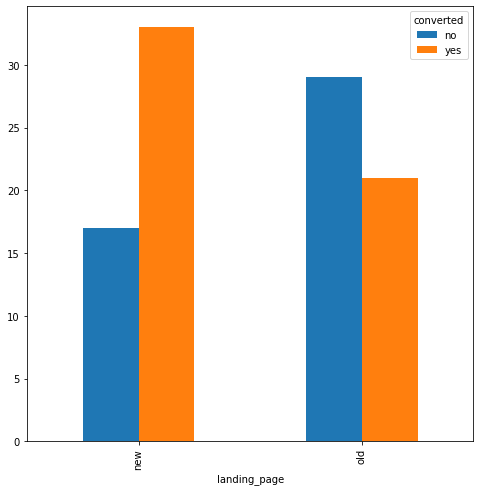

In [255]:
pd.crosstab(data['landing_page'],data['converted']).plot(kind="bar", figsize=(8,8),stacked=False,)  #displays bar plot of converted users for the new and old landing pages
plt.show()                                                                                          #displays the plot

### Step 1: Define the null and alternate hypotheses

For the given problem,

  $H_0$: $p_1$ = $p_2$

$H_a$: $p_1$< $p_2$ ,

where 
$p_1$ is the conversion proportion on the old landing page and 

$p_2$ is the conversion proportion on the new landing page.

### Step 2: Select Appropriate test

The above problem is a one-tailed problem involving 2 independent populations to test for proportions, hence a 2 sample proportions test will be used.

### Step 3: Decide the significance level

From the original problem, the significance level, $\alpha$ = 0.05

### Step 4: Collect and prepare data

In [256]:
N_old_landing_page = data['landing_page'].value_counts()['old']                       #returns the total users on the old landing page
N_new_landing_page = data['landing_page'].value_counts()['new']                       #returns the total users on the new landing page

print(N_old_landing_page, 'users visited the old landing page, while', N_new_landing_page, 'users visited the new langing page.')


50 users visited the old landing page, while 50 users visited the new langing page.


In [257]:
new_page_converted = data[data['landing_page']=='new'][data['converted']=='yes']      #sub dataset showing converted users on the new landing page
old_page_converted = data[data['landing_page']=='old'][data['converted']=='yes']      #sub dataset showing converted users on the old landing page
n_new_page_converted = new_page_converted.count()['converted']                        #returns number of converted users on the new landing page
n_old_page_converted = old_page_converted.count()['converted']                        #returns number of converted users on the old landing page

print(n_old_page_converted, 'users where converted from the old landing page, while', n_new_page_converted, 'users where converted from the new landing page')

21 users where converted from the old landing page, while 33 users where converted from the new landing page


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



### Step 5: Calculate the p-value

In [258]:
from statsmodels.stats.proportion import proportions_ztest                              #importing proportions z test function

N_landing_page  = ([N_old_landing_page,N_new_landing_page])                             #variable for total number of users on the landing pages
landing_page_count= n_old_page_converted, n_new_page_converted                          #variable for total number of converted users on the landing page

test_stat, p_value = proportions_ztest(landing_page_count, N_landing_page)              #calculates test stat and p-value
print('The p-value is',p_value)

The p-value is 0.016052616408112556


### Step 6: Compare the p-value with $\alpha$

In [259]:
if p_value > 0.05:                                                                      #conditional statement rejecting or accepting the p-value from preset values
  print('The null hypothesis is therefore accepted'),
else: 
  print('The null hypothesis is therefore rejected')

The null hypothesis is therefore rejected


### Step 7:  Draw inference

Since the null hypothesis was rejected from the comparison of the p-value with the $\alpha$ , there is enough evidence to show that the new landing page has a greater user convertion rate than the old landing page. This can also be seen from the visualization done.

## 3. Is the conversion and preferred language independent or related?

### Perform Visual Analysis

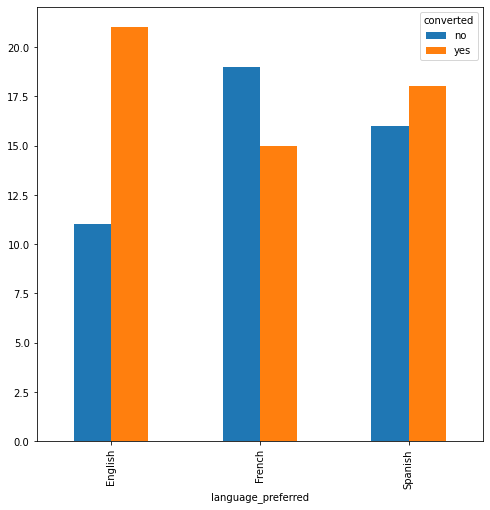

In [260]:
pd.crosstab(data['language_preferred'],data['converted']).plot(kind="bar", figsize=(8,8),stacked=False,)  #displays bar plot of converted users for the different languages
plt.show()                                                                                                #displays the plot

### Step 1: Define the null and alternate hypotheses

For the given problem,

  $H_0$: Conversion is independent of the prefered language.

$H_a$: Conversion is dependent on the prefered language.

### Step 2: Select Appropriate test

The above problem involves comparing 2 categorical variables(converted status and language prefered) to test for independence, hence a Chi square test of independence will be used.

### Step 3: Decide the significance level

As given from the original problem, the significance level, $\alpha$ = 0.05

### Step 4: Collect and prepare data

In [261]:
contingency_table = pd.crosstab(data['converted'], data['language_preferred'])          #creates a contingency table for the 'converted and language preferred column'

contingency_table                                                                       #returns the created contingency table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [262]:
from scipy.stats import chi2_contingency                                              #importing scipy function for calculating chi square test of independence

chi, p_value, dof, expected = chi2_contingency(contingency_table)                     #calculates the p-value
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [263]:
if p_value > 0.05:                                                                      #conditional statement rejecting or accepting the p-value from preset values
  print('The null hypothesis is therefore accepted'),
else: 
  print('The null hypothesis is therefore rejected')

The null hypothesis is therefore accepted


### Step 7:  Draw inference

Since the null hypothesis was accepted from the comparison of the p-value with the $\alpha$ , there is enough evidence to show that the conversion status is independent of the preferred.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [264]:
data_new = data[data['landing_page']=='new']                                            #creates a new dataset with only data from the new landing page

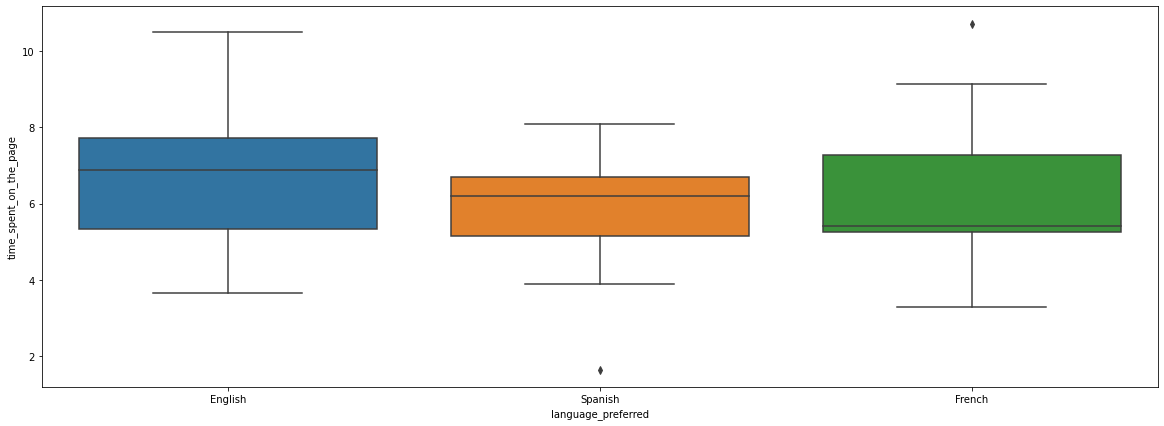

In [265]:
plt.figure(figsize=(20,7))                                                              #defines the size of the plot
sns.boxplot(data=data_new,x='language_preferred',y='time_spent_on_the_page');           #visualization of language preferred vs time spent on the new landing page
plt.show()                                                                              #displays the plot

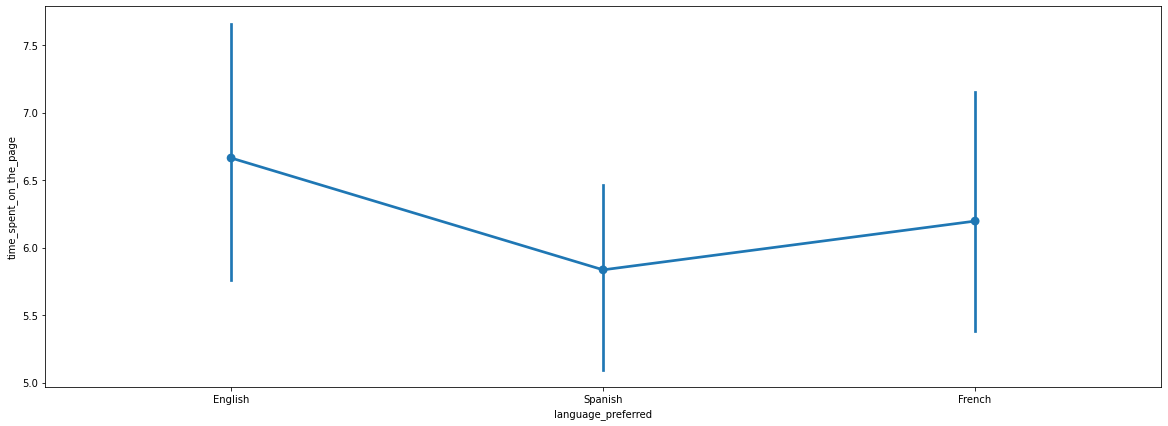

In [266]:
plt.figure(figsize=(20,7))                                                              #defines the size of the plot
sns.pointplot(data=data_new,x='language_preferred',y='time_spent_on_the_page');         #visualization of language preferred vs time spent on the new landing page
plt.show()                                                                              #displays the plot

### Step 1: Define the null and alternate hypotheses

For the given problem,

  $H_0$: $μ_1$ = $μ_2$ or $μ_1$ = $μ_3$ or  $μ_2$ = $μ_3$

$𝐻_a: 𝜇_1\neq𝜇_2 \text{ or } 𝜇_1\neq𝜇_3 \text{ or } 𝜇_2\neq𝜇_3$


where 
$μ_1$ is mean time spent on the new landing page for English as preferred language

$μ_2$ is mean time spent on the new landing page for Spanish and

$μ_3$ is the mean time spent on the new landing page for French as the preferred language 

### Step 2: Select Appropriate test

The above problem involves comparing the means of 3 populations to establish a difference,hence an ANOVA test will be used.

### Step 3: Decide the significance level

As given from the original problem, the significance level, $\alpha$ = 0.05

### Step 4: Collect and prepare data

In [267]:
english_new_time = data_new[data_new['language_preferred']=='English']['time_spent_on_the_page']      #returns time spent on the new page by English language users
spanish_new_time = data_new[data_new['language_preferred']=='Spanish']['time_spent_on_the_page']      #returns time spent on the new page by Spanish language users
french_new_time = data_new[data_new['language_preferred']=='French']['time_spent_on_the_page']        #returns time spent on the new page by French language users

In [268]:
english_new_time.mean()                                                                               #returns average time spent on the new page by English language users
spanish_new_time.mean()                                                                               #returns average time spent on the new page by Spanish language users
french_new_time.mean()                                                                                #returns average time spent on the new page by French language users

print('The mean time spent on the new landing page for preferred language of English, Spanish and French are' ,round(english_new_time.mean(),2),',', round(spanish_new_time.mean(),2),',', round(french_new_time.mean(),2), 'minutes respectively.')

The mean time spent on the new landing page for preferred language of English, Spanish and French are 6.66 , 5.84 , 6.2 minutes respectively.


### Step 5: Calculate the p-value

Perform Shapiro-Wilk's Test of normality. A p-value greater than 0.05 proves normality of the variable.

In [269]:
w, p_value = stats.shapiro(data_new['time_spent_on_the_page'])                        #scipy stats Shapiro function to test for normality
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Perform Levene's Test of variances. A p-value greater than 0.05 proves equality of variances.

In [270]:
from scipy.stats import levene                                                        #importing Levene's function from scipy stats
statistic, p_value = levene(english_new_time, spanish_new_time,french_new_time)       #calculates the p-value for Levene's test
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Perform One-way ANOVA Test. A p-value greater than 0.05 proves equality of the means 

In [271]:
from scipy.stats import f_oneway                                                      #importing function to perform oneway ANOVA test

test_stat, p_value = f_oneway(english_new_time, spanish_new_time,french_new_time)     #calculates p-value for ANOVA test
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [272]:
if p_value > 0.05:                                                                      #conditional statement rejecting or accepting the p-value from preset values
  print('The null hypothesis is therefore accepted'),
else: 
  print('The null hypothesis is therefore rejected')

The null hypothesis is therefore accepted


We can verify this by performing a Multiple Comparison test

In [273]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd                                                                       #importing function for performing Tukey HSD

m_comp = pairwise_tukeyhsd(endog = data_new['time_spent_on_the_page'], groups = data_new['language_preferred'], alpha = 0.05)   #performs Tukey HSD 
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
English  French  -0.4673 0.7259 -2.0035  1.069  False
English Spanish  -0.8285  0.401 -2.3647 0.7078  False
 French Spanish  -0.3612  0.816  -1.874 1.1516  False
-----------------------------------------------------


### Step 7:  Draw inference

Since the null hypothesis was accepted from the comparison of the p-value with the $\alpha$ , there is enough evidence to show that the time spent on the new landing page is the same for the 3 different languages. This is also confirmed from the results of the Multiple Comparison of Means test.

## Conclusion and Business Recommendations

In conclusion; 
1.	More time is spent on the new landing page, than on the old landing page, which indicates that the users find the additional content on the new landing page interesting.
2.	Between 5 to 6 minutes is the peak time spent by most users on the new landing page by users compared to 4 minutes by users of the old landing page.
3.	Some users spend more time on the new landing page than most of the others users on the new landing page
4.	Converted users spend more time on the landing page
5.	Spanish users appear to spend less time on the landing page than other language users, but this is not obvious.
6.	Although some users are converted from the old landing page, more users are converted from the new landing page.
7.	Although more English language users are with respect to other languages, there’s enough evidence to prove that conversion is independent of the preferred language
8.	The time spent by the 3 language groups on the new landing page is the same.




It is therefore recommended that;
1.  Additional content be added on the new landing page to further drive the convertion rate. This will also increase the time spent by the users because the converted users spend more time on the landing page.
2.  Work can be done to find out why the English users seem to be converted more even though it isn't obvious.
3.  Work should be done to find out why it appears that Spanish users spend less time on the landing page than other users, although this isn't obvious.